In [1]:
%load_ext autoreload
%autoreload 2

import sys
import pandas
sys.path.append("..")
#import pandas
import numpy as np
import matplotlib.pyplot as plt
import warnings
from numpy import random
warnings.filterwarnings('ignore')
import os

datadir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/TechnicalProject/Fig_Mechanics/Data/'
datadir2  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/TechnicalProject/Fig_Relaxation/Data/'

#datadir2  = '/nfs/scistore15/saricgrp/bmeadowc/Scratch/Collagen/model_strict_tetramer/EquilibriumSeededWorkflow/Data/'
plotsdir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/TechnicalProject/Fig_Mechanics/Plots/'

import sys

# Check the current recursion limit
current_limit = sys.getrecursionlimit()
print("Current recursion limit:", current_limit)
clrs = ['#a6611a','#dfc27d','#80cdc1','#018571','steelblue','slateblue']

# Increase the recursion limit
sys.setrecursionlimit(6000)

Current recursion limit: 3000


In [2]:
def phiform(phi0,phi_inf,tau,t):
    if tau==0:
        phi = phi_inf
    else:
        phi = (phi0)*np.exp(-t/tau)+phi_inf
    return phi

def intersection(y,y0):
    diff = []
    for i in range(len(y)):
        diff.append(float((y[i]-y0)*(y[i]-y0)))
    diff2 = sorted(diff)
    x = diff.index(diff2[0])
    return x , diff[x]

In [3]:
clrs00 = ['#A10035','#2A0944','lightsalmon','#3FA796','#FEC260','pink','#A10035','#2A0944','#3FA796']
cmap0 = plt.cm.get_cmap('Spectral_r') #YlOrBr
cmap1 = plt.cm.get_cmap('YlOrBr') #YlOrBr
#cmap2 = plt.cm.get_cmap('twilight') #twilight
cmap2 = plt.cm.get_cmap('GnBu') #twilight
cmap3 = plt.cm.get_cmap('BuPu') #twilight
clrs = ['#a6611a','#dfc27d','#80cdc1','#018571','#f5f5f5']
clrs2 = ['#ffffcc','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#0c2c84']
clrs3 = ['#c7e9b4','#7fcdbb','#1d91c0','#225ea8','#0c2c84']
clrs = ['#a6611a','#dfc27d','#80cdc1','#018571','steelblue','slateblue']


46021 27612.6
0.10476654430509033
0.3308371547190794
4548


Text(0.5, 1.0, '$\\tau = $90620')

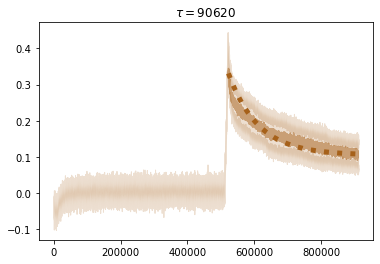

In [5]:
##--- reading data ---#

file = 'stressprofile.dat'
#Time Avstress stdstress
stress = pandas.read_csv(datadir+file, sep = ' ', header = 'infer')

Time = stress.Time
StressXAv_ = stress.Avstress
StressXStd = stress.stdstress
StressXAv = StressXAv_.values
print(len(Time),46021*(300/500))

##--- fitting exponential ---#
t_postStretch = int(46021*(285/500))
LastTs = 20 
str_inf = np.mean(StressXAv[-LastTs:])
print(str_inf)
str0 = StressXAv[t_postStretch]-str_inf
print(str0+str_inf)
strTau = str0/np.exp(1) + str_inf
StrD =StressXAv[t_postStretch:]
tau = intersection(StrD ,strTau)[0]
print(tau)
strTheory = []
for tt in range(len(Time[t_postStretch:])):
    t = Time[tt]
    tauT = Time[tau]
    strTheory.append(phiform(str0,str_inf,tauT,t))
    
##---plotting ---#  
    
fig,ax = plt.subplots()

ax.plot(Time[t_postStretch:],StressXAv[t_postStretch:],alpha = 0.5,color = clrs[0])
ax.fill_between(Time,np.add(StressXAv,StressXStd),np.add(StressXAv,-StressXStd),alpha = 0.2,color = clrs[0])
ax.plot(np.multiply(Time[t_postStretch:],1),strTheory,color = clrs[0],linestyle = ':',linewidth = 5)
ax.set_title(r'$\tau = $'+str(Time[tau])) #+Time[t_postStretch]

Text(0.5, 1.0, '$\\tau = $85680')

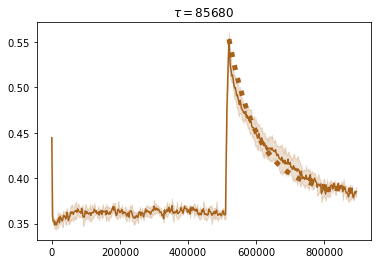

In [7]:
##--- reading data ---#
frame = 2040
file = 'alignment.dat'
#Time AvMSq AvMSqStd
almnt = pandas.read_csv(datadir+file, sep = ' ', header = 'infer')

time = almnt.Time
AvMSq_ = almnt.AvMSq
AvMSq = AvMSq_.values
AvMSqStd = almnt.AvMSqStd

##--- fitting exponential ---#
t_postStretch = 255
LastTs = 20 
phi_inf = np.mean(AvMSq[-LastTs:])
phi0 = AvMSq[t_postStretch]-phi_inf
phiTau = phi0/np.exp(1) + phi_inf
AvMSqD =AvMSq[t_postStretch:]
tau = intersection(AvMSqD,phiTau)[0]
phiTheory = []
for tt in range(len(time[t_postStretch:])):
    t = time[tt]
    phiTheory.append(phiform(phi0,phi_inf,tau,t))
    
##---plotting ---#    
    
fig,ax = plt.subplots()
ax.plot(np.multiply(time[t_postStretch:],frame),phiTheory,color = clrs[0],linestyle = ':',linewidth = 5)
ax.plot(np.multiply(time,frame),AvMSq,color = clrs[0])
ax.fill_between(np.multiply(time,frame),np.add(AvMSq,AvMSqStd),np.add(AvMSq,-AvMSqStd),alpha = 0.2,color = clrs[0])
ax.set_title(r'$\tau = $'+str(time[tau]*frame)) #+time[t_postStretch]*frame)



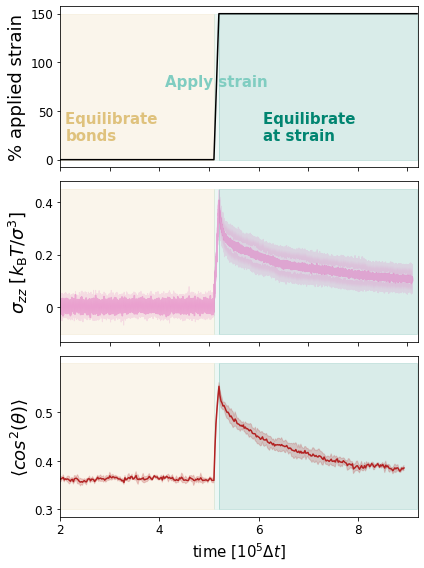

In [8]:
t_mix=10000
t_stretch=10000
t_relax=400000
t_bonds=500000
#Volume in time:
Vol = 72*72*12
strain = 1.5
VolTime = []
tstrcount = 0
for t in range(len(Time)):
    if Time[t] <= t_mix+t_bonds:
        VolTime.append(Vol)
    if Time[t] > t_mix+t_bonds and Time[t] <= t_mix+t_bonds + t_stretch:
        VolTime.append(Vol+Vol*strain*(Time[tstrcount]/t_stretch))
        tstrcount+=1
    if Time[t] > t_mix+t_bonds + t_stretch:
        VolTime.append((1+strain)*Vol)


#Setting up Plotting 
alph = 0.15
UBS = [150,0.45,0.6,20]
LBS = [0,-0.1,0.3,0]
#fig,ax=plt.subplots(4,1,figsize = (6,12))
fig,ax=plt.subplots(3,1,figsize = (6,8))
for i in range(3):
    #ax[i].fill_between([0,t_mix],[LBS[i],LBS[i]],[UBS[i],UBS[i]],alpha = alph,color = clrs[0])
    ax[i].fill_between([t_mix,t_bonds+t_mix],[LBS[i],LBS[i]],[UBS[i],UBS[i]],alpha = alph,color = clrs[1])
    ax[i].fill_between([t_bonds+t_mix,t_stretch+t_bonds+t_mix],[LBS[i],LBS[i]],[UBS[i],UBS[i]],alpha = alph,color = clrs[2])
    ax[i].fill_between([t_stretch+t_bonds+t_mix,t_relax+t_stretch+t_bonds+t_mix],[LBS[i],LBS[i]],[UBS[i],UBS[i]],alpha = alph,color = clrs[3])
    ax[i].set_xlim([20000,t_relax+t_stretch+t_bonds+t_mix])


times = [0,t_mix,t_mix+t_bonds,t_mix+t_bonds+t_stretch,t_mix+t_bonds+t_stretch+t_relax]

text1 = "Mix protomers"
text2 = "Equilibrate \nbonds"
text3 = "Apply strain"
text4 = "Equilibrate \nat strain"
fs1 = 15
fs2 = 18
#ax[0].text(-1000,75,text1,color = clrs[0],fontsize =fs1,fontweight='bold')
ax[0].text(t_mix+200000,20,text2,color = clrs[1],fontsize =fs1,fontweight='bold')
ax[0].text(t_bonds+t_mix-98000,75,text3,color = clrs[2],fontsize =fs1,fontweight='bold')
ax[0].text(t_bonds+t_mix+100000,20,text4,color = clrs[3],fontsize =fs1,fontweight='bold')

#Plotting protocol

strains  = [0,0,0,100*strain,100*strain]
ax[0].set_ylabel("% applied strain",fontsize =fs2)
#ax[0].set_xlabel(r"time [$\Delta t$]",fontsize =fs1)
ax[0].plot(times,strains,color = "black")

#Plotting stress 
ax[1].fill_between(Time,np.add(StressXAv,StressXStd),np.add(StressXAv,-StressXStd),alpha = 0.2,color = "tab:pink")
ax[1].plot(Time,StressXAv,color = "tab:pink",alpha = 0.5)
ax[1].set_ylabel(r"$\sigma_{zz} ~[k_{\mathrm{B}}T/\sigma^{3}$]",fontsize =fs2)
#ax[1].set_xlabel(r"time [$\Delta t$]",fontsize =fs1)


#Plotting alignment

frame = 2040
ax[2].plot(np.multiply(time,frame),AvMSq,alpha = 1,color = 'firebrick')
ax[2].fill_between(np.multiply(time,frame),np.add(AvMSq,AvMSqStd),np.add(AvMSq,-AvMSqStd),alpha = 0.2,color = 'firebrick')
ax[2].set_ylabel(r'$\langle cos^{2}(\theta)\rangle$',fontsize =fs2)
ax[2].set_xlabel(r"time [$\Delta t$]",fontsize =fs1)
ms=3


#Plotting bonds


ax[0].set_xlim([200000,t_relax+t_stretch+t_bonds+t_mix+1000])
ax[1].set_xlim([200000,t_relax+t_stretch+t_bonds+t_mix+1000])
ax[2].set_xlim([200000,t_relax+t_stretch+t_bonds+t_mix+1000])

ax[0].set_yticks([0,50,100,150],['0','50','100','150'],fontsize = 12)
ax[1].set_yticks([0,0.2,0.4],['0','0.2','0.4'],fontsize = 12)
ax[2].set_yticks([0.3,0.4,0.5],['0.3','0.4','0.5'],fontsize = 12)
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
#ax[2].set_xticklabels([])
ax[2].set_xticks([200000,400000,600000,800000],['2','4','6','8'],fontsize = 12)
ax[2].set_xlabel(r"time [$10^5\Delta t$]",fontsize =fs1)
fig.tight_layout()
plotname = "MasterMechanics_ChemEng5.0_seedsV2_IvanEdits.pdf"
plotname = "MasterMechanics_ChemEng5.0_seedsV2_IvanEdits.png"
#fig.savefig(plotsdir+plotname)



4097 27612.6
0.012005805834097239
0.012005805834097239
0.19296733410314054
109
4207 27612.6
0.01010658724020901
0.01010658724020901
0.44591953097738135
231
4068 27612.6
0.1341260531067172
0.1341260531067172
0.5555908794199418
387
4070 27612.6
0.23306047495568635
0.23306047495568635
0.5893197695599017
246
4258 27612.6
0.28029262200540356
0.28029262200540356
0.6056397560365262
268


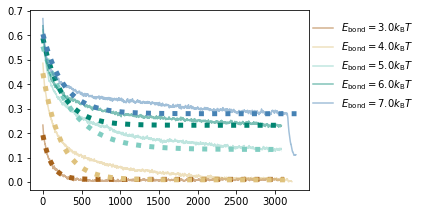

In [95]:
fs = 14
fig,ax = plt.subplots(figsize = (5,3.3))
frame = 440
ChemEngs = "3.0 4.0 5.0 6.0 7.0".split() #3.0 4.0 5.0 6.0 7.0 100.0
tausstress= []
#str_inf0=1
Infs_ova_inf0_strss =[]
Deltas_ova_inf0_strss = []
for e in range(len(ChemEngs)):
    file = 'stressprofiles/stress_E'+str(ChemEngs[e])+'.dat'
    stress = pandas.read_csv(datadir+file, sep = ' ', header = 'infer')
    Time = stress.Time
    StressXFull_ = stress.Avstress
    StressXStd = stress.stdstress
    StressXFull = StressXFull_.values
    print(len(Time),46021*(300/500))
    N=10
    t_postStretch = int((4097-N)*(120/500))
    StressXAv = np.convolve(np.abs(np.ravel(StressXFull[t_postStretch:])), np.ones(N)/N, mode='valid')
    ##--- fitting exponential ---#
    LastTs = 100
    str_inf = np.mean(StressXAv[-LastTs*2:-LastTs])
    print(str_inf)
    print(str_inf)
    str0 = StressXAv[10]-str_inf
    print(str0+str_inf)
    strTau = str0/np.exp(1) + str_inf
    StrD =StressXAv
    tau = intersection(StrD ,strTau)[0]
    print(tau)
    if e==4:
        str_inf0=str_inf
        str00 = str0
    tausstress.append(tau)
    Infs_ova_inf0_strss.append(str_inf/str_inf0)
    Deltas_ova_inf0_strss.append(str0/str00)
    strTheory = []
    for tt in range(len(Time[t_postStretch:])):
        t = Time[tt]
        tauT = Time[tau]
        strTheory.append(phiform(str0,str_inf,tauT,t))
    #ax.plot(Time[t_postStretch+int(N/2):-int(N/2)+1],StressXAv[t_postStretch:],alpha = 0.5,color = clrs[e],label = r'$E_{\mathrm{bond}} = $'+ChemEngs[e]+r'$k_{\mathrm{B}}T$')
    ax.plot(StressXAv,alpha = 0.5,color = clrs[e],label = r'$E_{\mathrm{bond}} = $'+ChemEngs[e]+r'$k_{\mathrm{B}}T$')
    #ax.fill_between(Time[int(N/2):-int(N/2)+1],np.add(StressXAv,StressXStd),np.add(StressXAv,-StressXStd),alpha = 0.2,color = clrs[e])
    ax.plot(strTheory,color = clrs[e],linestyle = ':',linewidth = 5)
    #ax.plot(np.multiply(Time[t_postStretch:],1),strTheory,color = clrs[e],linestyle = ':',linewidth = 5)
    #ax.set_title(r'$\tau = $'+str(Time[tau])) #+Time[t_postStretch]
#ax.set_title("Stretch = 150%")
#ax.set_xlabel(r"time [$10^{4}\Delta t$]",fontsize =fs)
#ax.set_ylabel(r'$\phi = \langle cos^{2}(\theta)\rangle$',fontsize =fs)
#ax.set_xticks([0,40000,80000,120000,160000],['0','4','8','12','16'])
#ax.set_xlim([-35000,160000])
#ax.set_ylim([0.33,0.65])
#ax.set_xlim([0,160000])
ax.legend(frameon=False,loc = [1.,0.42],fontsize=10)
#fig.tight_layout()
#fig.savefig(plotsdir+'Multiple_Ebind_Relax.pdf')





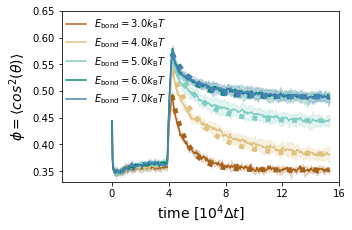

In [97]:
fs = 14
fig,ax = plt.subplots(figsize = (5,3.3))
frame = 440
ChemEngs = "3.0 4.0 5.0 6.0 7.0".split() #3.0 4.0 5.0 6.0 7.0 100.0
tausalnt = []
#inf0 = 1
Infs_ova_inf0_almnt = []
Deltas_ova_inf0_almnt = []
for e in range(len(ChemEngs)):
    file = 'alignmentrelax_E'+str(ChemEngs[e])+'.dat'
    almnt = pandas.read_csv(datadir2+file, sep = ' ', header = 'infer')
    time = almnt.Time
    AvMSq_ = almnt.AvMSq
    AvMSq = AvMSq_.values
    AvMSqStd = almnt.AvMSqStd
    t_postStretch = 96
    LastTs = 20 
    phi_inf = np.mean(AvMSq[-LastTs:])
    phi0 = AvMSq[t_postStretch]-phi_inf
    phiTau = phi0/np.exp(1) + phi_inf
    AvMSqD =AvMSq[t_postStretch:]
    tau = intersection(AvMSqD,phiTau)[0]
    phiTheory = []
    if e==4:
        inf0 = phi_inf
        phi00 = phi0
    Infs_ova_inf0_almnt.append(phi_inf/inf0)
    Deltas_ova_inf0_almnt.append(phi0/phi00)
    for tt in range(len(time[t_postStretch:])):
        t = time[tt]
        phiTheory.append(phiform(phi0,phi_inf,tau,t))
    if e==2:
        AvMsqSave = AvMSq
        AvMsqStdSave = AvMSqStd
        phiThSave, tauSave, phiinfSave,phi0Save = phiTheory,tau,phi_inf,phi0
    tausalnt.append(tau)
    ax.plot(np.multiply(time,frame),AvMSq,color = clrs[e],label = r'$E_{\mathrm{bond}} = $'+ChemEngs[e]+r'$k_{\mathrm{B}}T$')
    ax.fill_between(np.multiply(time,frame),np.add(AvMSq,AvMSqStd),np.add(AvMSq,-AvMSqStd),alpha = 0.2,color = clrs[e])
    ax.plot(np.multiply(time[t_postStretch:],frame),phiTheory,color = clrs[e],linestyle = ':',linewidth = 5)

#ax.set_title("Stretch = 150%")
ax.set_xlabel(r"time [$10^{4}\Delta t$]",fontsize =fs)
ax.set_ylabel(r'$\phi = \langle cos^{2}(\theta)\rangle$',fontsize =fs)
ax.set_xticks([0,40000,80000,120000,160000],['0','4','8','12','16'])
ax.set_xlim([-35000,160000])
ax.set_ylim([0.33,0.65])
#ax.set_xlim([0,160000])
ax.legend(frameon=False,loc = [0.,0.42],fontsize=10)
fig.tight_layout()
#fig.savefig(plotsdir+'Multiple_Ebind_Relax.pdf')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


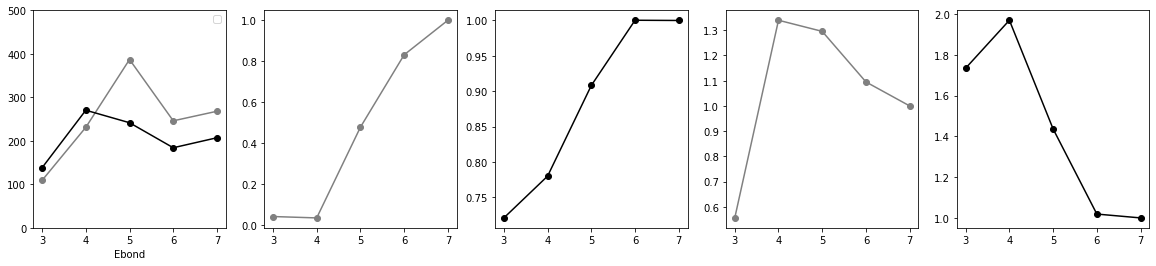

In [98]:
fig,ax =plt.subplots(1,5,figsize = (20,4))
Ebond = [3,4,5,6,7]
for e in range(len(ChemEngs)-1):
    e+=1
    #ax.plot(tausstress[e],tausalnt[e],color = clrs[e],marker = 'o',label = r'$E_{\mathrm{bond}} = $'+ChemEngs[e]+r'$k_{\mathrm{B}}T$')
ax[0].plot(Ebond,tausstress,color = 'grey',marker = 'o')
ax[1].plot(Ebond,Infs_ova_inf0_strss,color = 'grey',marker = 'o')
ax[2].plot(Ebond,Infs_ova_inf0_almnt,color = 'black',marker = 'o')
ax[3].plot(Ebond,Deltas_ova_inf0_strss,color = 'grey',marker = 'o')
ax[4].plot(Ebond,Deltas_ova_inf0_almnt,color = 'black',marker = 'o')
ax[0].plot(Ebond,np.multiply(tausalnt,46021/8000),color = 'black',marker = 'o')
ax[0].set_xlabel("Ebond")
ax[0].set_ylim([0,500])
ax[0].legend()
